In [2]:
import requests
import json
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
lat = "41.0188"
lon = "-73.6814"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/41.0188,-73.6814',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-73.6814, 41.0188]},
 'properties': {'@id': 'https://api.weather.gov/p

In [4]:
forecast = json_file["properties"]["forecast"] #got it
new_request = requests.get(forecast)

json = new_request.json()
json

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-73.6997408, 41.0213135],
    [-73.704283, 40.999675499999995],
    [-73.6756034, 40.99624489999999],
    [-73.6710553, 41.01788259999999],
    [-73.6997408, 41.0213135]]]},
 'properties': {'updated': '2023-03-20T14:27:28+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-20T19:04:15+00:00',
  'updateTime': '2023-03-20T14:27:28+00:00',
  'validTimes': '2023-03-20T08:00:00+00:00/P7DT2H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 49.0728},
  'periods': [{'number': 1,
    'name': 'This Afternoon',
    'startTime': '2023-03-20T15:00:00-04:00',
    'endTime': '2023-03-20T18:0

In [5]:
json1 = json["properties"]["periods"]
json1

for j in json1: 
    print(j["name"])
    print(str(j["temperature"]) + j["temperatureUnit"])
    print(j["detailedForecast"])

This Afternoon
50F
Sunny. High near 50, with temperatures falling to around 48 in the afternoon. Southwest wind around 13 mph.
Tonight
31F
Mostly clear, with a low around 31. Southwest wind 3 to 9 mph.
Tuesday
58F
Sunny, with a high near 58. West wind 3 to 12 mph.
Tuesday Night
37F
Partly cloudy, with a low around 37. Southwest wind 5 to 12 mph.
Wednesday
57F
A slight chance of rain showers after 2pm. Partly sunny. High near 57, with temperatures falling to around 53 in the afternoon. South wind 5 to 14 mph. Chance of precipitation is 20%.
Wednesday Night
45F
A slight chance of rain showers before 8pm, then a chance of rain. Cloudy, with a low around 45. Chance of precipitation is 30%.
Thursday
62F
A chance of rain. Mostly cloudy, with a high near 62. Chance of precipitation is 50%.
Thursday Night
47F
A chance of rain. Mostly cloudy, with a low around 47. Chance of precipitation is 40%.
Friday
57F
A chance of rain. Cloudy, with a high near 57. Chance of precipitation is 50%.
Friday Nig

In [6]:
data_file = open("weather.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(data_file)
csv_writer.writerow(["Day", "Temp", "Description"])

for j in json1: 
    name = (j["name"])
    temp = (str(j["temperature"]) + j["temperatureUnit"])
    description = (j["detailedForecast"])
    print(name, temp, description)

    csv_writer.writerow([name, temp, description])
        
data_file.close()

This Afternoon 50F Sunny. High near 50, with temperatures falling to around 48 in the afternoon. Southwest wind around 13 mph.
Tonight 31F Mostly clear, with a low around 31. Southwest wind 3 to 9 mph.
Tuesday 58F Sunny, with a high near 58. West wind 3 to 12 mph.
Tuesday Night 37F Partly cloudy, with a low around 37. Southwest wind 5 to 12 mph.
Wednesday 57F A slight chance of rain showers after 2pm. Partly sunny. High near 57, with temperatures falling to around 53 in the afternoon. South wind 5 to 14 mph. Chance of precipitation is 20%.
Wednesday Night 45F A slight chance of rain showers before 8pm, then a chance of rain. Cloudy, with a low around 45. Chance of precipitation is 30%.
Thursday 62F A chance of rain. Mostly cloudy, with a high near 62. Chance of precipitation is 50%.
Thursday Night 47F A chance of rain. Mostly cloudy, with a low around 47. Chance of precipitation is 40%.
Friday 57F A chance of rain. Cloudy, with a high near 57. Chance of precipitation is 50%.
Friday Nig

In [7]:
sheet = pd.read_csv("weather.csv")
sheet

,Day,Temp,Description
0,This Afternoon,50F,"Sunny. High near 50, with temperatures falling..."
1,Tonight,31F,"Mostly clear, with a low around 31. Southwest ..."
2,Tuesday,58F,"Sunny, with a high near 58. West wind 3 to 12 ..."
3,Tuesday Night,37F,"Partly cloudy, with a low around 37. Southwest..."
4,Wednesday,57F,A slight chance of rain showers after 2pm. Par...
5,Wednesday Night,45F,"A slight chance of rain showers before 8pm, th..."
6,Thursday,62F,"A chance of rain. Mostly cloudy, with a high n..."
7,Thursday Night,47F,"A chance of rain. Mostly cloudy, with a low ar..."
8,Friday,57F,"A chance of rain. Cloudy, with a high near 57...."
9,Friday Night,40F,"A chance of rain. Mostly cloudy, with a low ar..."


In [8]:
sheet2 = sheet.sort_values("Temp", ascending = True)
sheet2

,Day,Temp,Description
1,Tonight,31F,"Mostly clear, with a low around 31. Southwest ..."
3,Tuesday Night,37F,"Partly cloudy, with a low around 37. Southwest..."
13,Sunday Night,37F,A slight chance of rain after 2am. Partly clou...
11,Saturday Night,38F,"Rain likely before 2am. Mostly cloudy, with a ..."
9,Friday Night,40F,"A chance of rain. Mostly cloudy, with a low ar..."
5,Wednesday Night,45F,"A slight chance of rain showers before 8pm, th..."
7,Thursday Night,47F,"A chance of rain. Mostly cloudy, with a low ar..."
0,This Afternoon,50F,"Sunny. High near 50, with temperatures falling..."
10,Saturday,52F,"Rain likely. Mostly cloudy, with a high near 5..."
12,Sunday,54F,"Mostly sunny, with a high near 54."


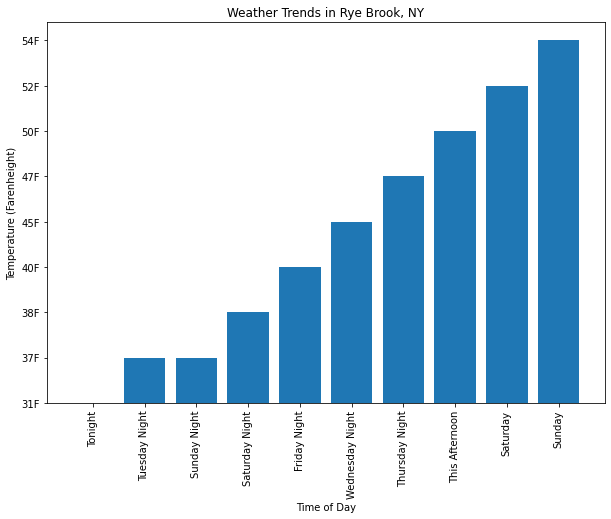

In [9]:
df = pd.DataFrame(sheet2)

name = df["Day"]
pop = df["Temp"]

fig = plt.figure(figsize = (10, 7))
plt.bar(name[0:10], pop[0:10])

plt.ylabel("Temperature (Farenheight)")
plt.xlabel("Time of Day")
plt.title("Weather Trends in Rye Brook, NY")
plt.xticks(rotation='vertical') #Bonus, https://pythonguides.com/matplotlib-bar-chart-labels/ this was the source I used 

plt.show()

In [10]:
#public holiday API call 1

countryCode = "ZW"
genius1 = requests.get(f"https://date.nager.at/api/v3/CountryInfo/{countryCode}")

json_file1 = genius1.json()
json_file1

#this call is telling you what Country the Country code you chose belongs to
#you use the link provided from the site and can set your own country code as shown above
#then turn it into a json file to view

{'commonName': 'Zimbabwe',
 'officialName': 'Republic of Zimbabwe',
 'countryCode': 'ZW',
 'region': 'Africa',
 'borders': [{'commonName': 'Botswana',
   'officialName': 'Republic of Botswana',
   'countryCode': 'BW',
   'region': 'Africa',
   'borders': None},
  {'commonName': 'Mozambique',
   'officialName': 'Republic of Mozambique',
   'countryCode': 'MZ',
   'region': 'Africa',
   'borders': None},
  {'commonName': 'South Africa',
   'officialName': 'Republic of South Africa',
   'countryCode': 'ZA',
   'region': 'Africa',
   'borders': None},
  {'commonName': 'Zambia',
   'officialName': 'Republic of Zambia',
   'countryCode': 'ZM',
   'region': 'Africa',
   'borders': None}]}

In [11]:
#public holiday API call 2

genius2 = requests.get(f"https://date.nager.at/api/v3/AvailableCountries")

json_file2 = genius2.json()
json_file2

#this prints off the country codes for the available countries on the API
#here we can see the US for United States and the others for all other countries

[{'countryCode': 'AD', 'name': 'Andorra'},
 {'countryCode': 'AL', 'name': 'Albania'},
 {'countryCode': 'AR', 'name': 'Argentina'},
 {'countryCode': 'AT', 'name': 'Austria'},
 {'countryCode': 'AU', 'name': 'Australia'},
 {'countryCode': 'AX', 'name': 'Åland Islands'},
 {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'},
 {'countryCode': 'BB', 'name': 'Barbados'},
 {'countryCode': 'BE', 'name': 'Belgium'},
 {'countryCode': 'BG', 'name': 'Bulgaria'},
 {'countryCode': 'BJ', 'name': 'Benin'},
 {'countryCode': 'BO', 'name': 'Bolivia'},
 {'countryCode': 'BR', 'name': 'Brazil'},
 {'countryCode': 'BS', 'name': 'Bahamas'},
 {'countryCode': 'BW', 'name': 'Botswana'},
 {'countryCode': 'BY', 'name': 'Belarus'},
 {'countryCode': 'BZ', 'name': 'Belize'},
 {'countryCode': 'CA', 'name': 'Canada'},
 {'countryCode': 'CH', 'name': 'Switzerland'},
 {'countryCode': 'CL', 'name': 'Chile'},
 {'countryCode': 'CN', 'name': 'China'},
 {'countryCode': 'CO', 'name': 'Colombia'},
 {'countryCode': 'CR', 'name':

In [12]:
#public holiday API call 3

genius3 = requests.get(f"https://date.nager.at/api/v3/LongWeekend/2020/US")

json_file3 = genius3.json()
json_file3

#this will print the long weekends in the US for the year 2022 (based on the data i inputed)

[{'startDate': '2020-01-18',
  'endDate': '2020-01-20',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2020-02-15',
  'endDate': '2020-02-17',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2020-05-23',
  'endDate': '2020-05-25',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2020-07-03',
  'endDate': '2020-07-05',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2020-09-05',
  'endDate': '2020-09-07',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2020-11-26',
  'endDate': '2020-11-29',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2020-12-25',
  'endDate': '2020-12-27',
  'dayCount': 3,
  'needBridgeDay': False}]

In [13]:
#public holiday API call 4

genius4 = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2022/IT")

json_file4 = genius4.json()
json_file4

#displaying all public holidays in italy in 2022

[{'date': '2022-01-01',
  'localName': 'Capodanno',
  'name': "New Year's Day",
  'countryCode': 'IT',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': 1967,
  'types': ['Public']},
 {'date': '2022-01-06',
  'localName': 'Epifania',
  'name': 'Epiphany',
  'countryCode': 'IT',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2022-04-17',
  'localName': 'Pasqua',
  'name': 'Easter Sunday',
  'countryCode': 'IT',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2022-04-18',
  'localName': "Lunedì dell'Angelo",
  'name': 'Easter Monday',
  'countryCode': 'IT',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': 1642,
  'types': ['Public']},
 {'date': '2022-04-25',
  'localName': 'Festa della Liberazione',
  'name': 'Liberation Day',
  'countryCode': 'IT',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear

In [14]:
#public holiday API call 5

genius5 = requests.get(f"https://date.nager.at/api/v3/IsTodayPublicHoliday/IT")

json_file5 = genius5.json()
json_file5

#this tells us if it a public holiday in the US based on the code response

JSONDecodeError: [Errno Expecting value] : 0

In [15]:
#public holiday API call 6

genius6 = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidays/BE")

json_file6 = genius6.json()
json_file6

#this tells us the upcoming holidays in the US, it'll give detailed about which states it applies to, the launchyear, if it is global, and the type of holiday

[{'date': '2023-04-09',
  'localName': 'Pasen',
  'name': 'Easter Sunday',
  'countryCode': 'BE',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-10',
  'localName': 'Paasmaandag',
  'name': 'Easter Monday',
  'countryCode': 'BE',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': 1642,
  'types': ['Public']},
 {'date': '2023-05-01',
  'localName': 'Dag van de arbeid',
  'name': 'Labour Day',
  'countryCode': 'BE',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-18',
  'localName': 'Onze Lieve Heer hemel',
  'name': 'Ascension Day',
  'countryCode': 'BE',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-29',
  'localName': 'Pinkstermaandag',
  'name': 'Whit Monday',
  'countryCode': 'BE',
  'fixed': False,
  'global': True,
  'counties': None,
  'launc

In [16]:
#public holiday API call 7

genius7 = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")

json_file7 = genius7.json()
json_file7

#tells us public holidays worldwide for the next 7 days

[{'date': '2023-03-20',
  'localName': 'Día de San José',
  'name': "Saint Joseph's Day",
  'countryCode': 'CO',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'San José',
  'name': "St. Joseph's Day",
  'countryCode': 'ES',
  'fixed': True,
  'global': False,
  'counties': ['ES-MD'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Natalicio de Benito Juárez',
  'name': "Benito Juárez's birthday",
  'countryCode': 'MX',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Otago Anniversary Day',
  'name': 'Otago Anniversary Day',
  'countryCode': 'NZ',
  'fixed': False,
  'global': False,
  'counties': ['NZ-OTA'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'TN',

In [18]:
countryCode = ["US", "IT", "ZW", "CA", "FR", "CN", "DE", "BR", "BE", "PY"]

for j in countryCode:
    ten = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2023/{j}") #public holidays in this year
    json_file6 = ten.json()
    print(" ")
    print(j)
    print(" ")
    print(json_file6)
 #orgional for loop to get public holidays from 10 countries of my choice

 
US
 
[{'date': '2023-01-02', 'localName': "New Year's Day", 'name': "New Year's Day", 'countryCode': 'US', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-16', 'localName': 'Martin Luther King, Jr. Day', 'name': 'Martin Luther King, Jr. Day', 'countryCode': 'US', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-02-20', 'localName': 'Presidents Day', 'name': "Washington's Birthday", 'countryCode': 'US', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-07', 'localName': 'Good Friday', 'name': 'Good Friday', 'countryCode': 'US', 'fixed': False, 'global': False, 'counties': ['US-CT', 'US-DE', 'US-HI', 'US-IN', 'US-KY', 'US-LA', 'US-NC', 'US-ND', 'US-NJ', 'US-TN'], 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-07', 'localName': 'Good Friday', 'name': 'Good Friday', 'countryCode': 'US', 'fixed': Fa

In [49]:
countryCode = ["US", "IT", "ZW", "CA", "FR", "CN", "DE", "BR", "BE", "PY"]

full_list = []

n = 0 
for j in countryCode:
    ten = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2023/{j}") #public holidays in this year
    json_file6 = ten.json()
    print(" ")
    print(j)
    print(" ")
    print(json_file6)
    
    json7 = json_file6[n]
    full_list.append(json7)
    
    n+=1  

 
US
 
[{'date': '2023-01-02', 'localName': "New Year's Day", 'name': "New Year's Day", 'countryCode': 'US', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-16', 'localName': 'Martin Luther King, Jr. Day', 'name': 'Martin Luther King, Jr. Day', 'countryCode': 'US', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-02-20', 'localName': 'Presidents Day', 'name': "Washington's Birthday", 'countryCode': 'US', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-07', 'localName': 'Good Friday', 'name': 'Good Friday', 'countryCode': 'US', 'fixed': False, 'global': False, 'counties': ['US-CT', 'US-DE', 'US-HI', 'US-IN', 'US-KY', 'US-LA', 'US-NC', 'US-ND', 'US-NJ', 'US-TN'], 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-07', 'localName': 'Good Friday', 'name': 'Good Friday', 'countryCode': 'US', 'fixed': Fa

In [50]:
print(full_list)
print(10)
# the list of all holidays from the for loop
#this method is only able to isolate and count 10 holidays, one from each coutry 

[{'date': '2023-01-02', 'localName': "New Year's Day", 'name': "New Year's Day", 'countryCode': 'US', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-06', 'localName': 'Epifania', 'name': 'Epiphany', 'countryCode': 'IT', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-07', 'localName': 'Good Friday', 'name': 'Good Friday', 'countryCode': 'ZW', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-02-20', 'localName': 'Heritage Day', 'name': 'Heritage Day', 'countryCode': 'CA', 'fixed': False, 'global': False, 'counties': ['CA-NS'], 'launchYear': None, 'types': ['Public']}, {'date': '2023-05-18', 'localName': 'Ascension', 'name': 'Ascension Day', 'countryCode': 'FR', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-09-29', 'localName': '中秋节', 'name': 'Mid-A